In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import linear_model
import warnings

In [47]:
data = pd.read_csv('C:\\Users\\Admin/cap_clean2.csv')

In [48]:
data.head()

,Population,Age,Gender,Race,Manner_of_death,Armed,Mental_illness,Flee,Date
0,196620,NaN,2,-1,-1,-1,2,2,NaN
1,196620,NaN,2,-1,-1,-1,2,2,NaN
2,101764,50.0,2,1,1,19,1,1,2005-04-18
3,101764,23.0,2,1,1,19,1,1,2007-10-14
4,101764,48.0,2,1,1,8,1,1,2014-06-09


In [49]:
data.dropna()

,Population,Age,Gender,Race,Manner_of_death,Armed,Mental_illness,Flee,Date
2,101764,50.0,2,1,1,19,1,1,2005-04-18
3,101764,23.0,2,1,1,19,1,1,2007-10-14
4,101764,48.0,2,1,1,8,1,1,2014-06-09
5,101764,50.0,2,6,1,19,1,1,2015-08-20
6,101764,50.0,2,6,2,29,2,1,2015-08-20
...,...,...,...,...,...,...,...,...,...
8375,595619,46.0,2,6,1,19,1,1,2013-04-27
8376,595619,39.0,2,3,1,11,2,1,2010-11-20
8377,595619,29.0,2,3,1,11,2,1,2010-12-20
8378,595619,37.0,2,3,1,19,1,1,2011-06-26


In [50]:
data.columns

Index(['Population', 'Age', 'Gender', 'Race', 'Manner_of_death', 'Armed',
       'Mental_illness', 'Flee', 'Date'],
      dtype='object')

In [51]:
data.drop("Date", axis=1)

,Population,Age,Gender,Race,Manner_of_death,Armed,Mental_illness,Flee
0,196620,NaN,2,-1,-1,-1,2,2
1,196620,NaN,2,-1,-1,-1,2,2
2,101764,50.0,2,1,1,19,1,1
3,101764,23.0,2,1,1,19,1,1
4,101764,48.0,2,1,1,8,1,1
...,...,...,...,...,...,...,...,...
8375,595619,46.0,2,6,1,19,1,1
8376,595619,39.0,2,3,1,11,2,1
8377,595619,29.0,2,3,1,11,2,1
8378,595619,37.0,2,3,1,19,1,1


In [52]:
data[["Population","Age","Gender", "Armed","Flee", "Manner_of_death"]].corr

<bound method DataFrame.corr of       Population   Age  Gender  Armed  Flee  Manner_of_death
0         196620   NaN       2     -1     2               -1
1         196620   NaN       2     -1     2               -1
2         101764  50.0       2     19     1                1
3         101764  23.0       2     19     1                1
4         101764  48.0       2      8     1                1
...          ...   ...     ...    ...   ...              ...
8375      595619  46.0       2     19     1                1
8376      595619  39.0       2     11     1                1
8377      595619  29.0       2     11     1                1
8378      595619  37.0       2     19     1                1
8379      595619  38.0       2     19     1                1

[8380 rows x 6 columns]>

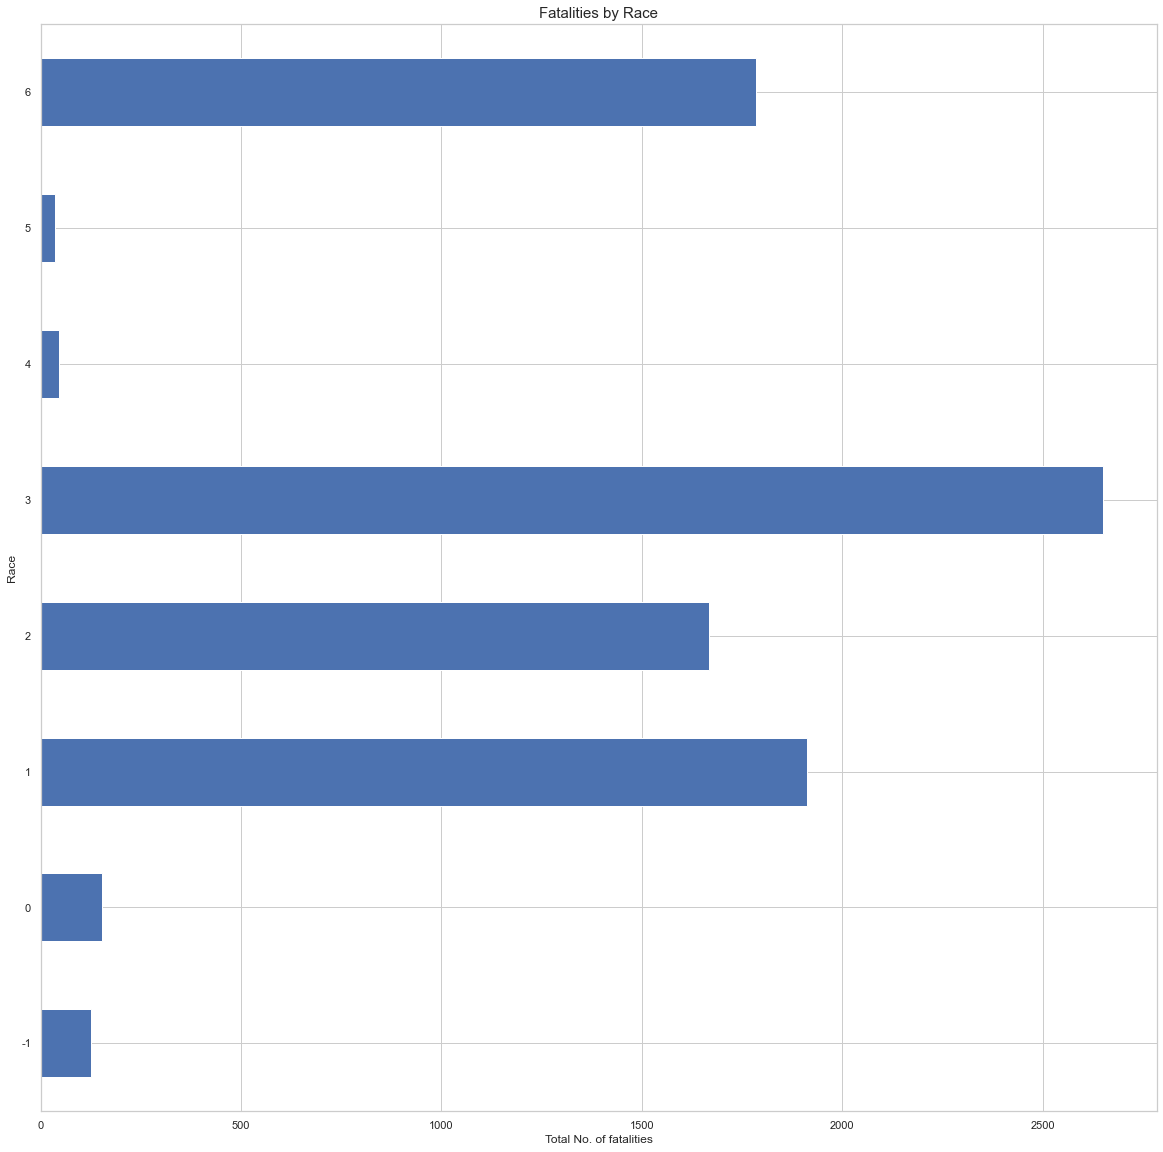

In [53]:
#Fatalities w.r.t race
sns.set(context='notebook', style='whitegrid')
pl.figure(figsize =(20,20))
data.groupby(['Race']).Population.count().plot(kind='barh')
plt.xlabel('Total No. of fatalities', fontsize=12)
plt.ylabel('Race', fontsize=12)
plt.title('Fatalities by Race', fontsize=15)
plt.show()

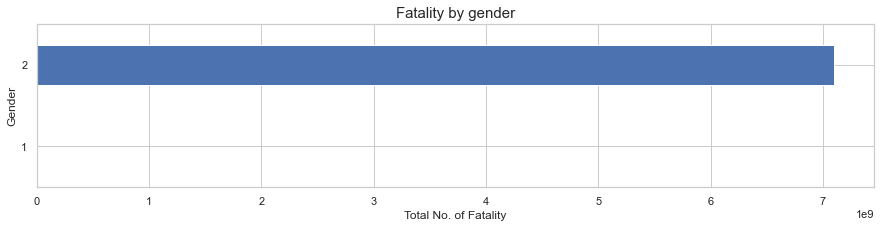

In [54]:
#Fatalities w.r.t gender
pl.figure(figsize =(15,3))
data.groupby(['Gender']).Population.sum().plot(kind='barh')
plt.xlabel('Total No. of Fatality', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title('Fatality by gender', fontsize=15)
plt.show()

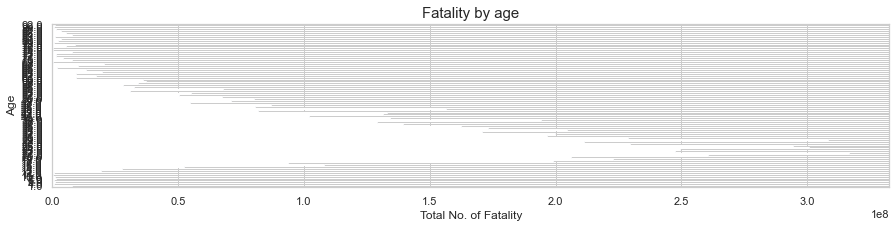

In [55]:
#Fatalities w.r.t age buckets
pl.figure(figsize =(15,3))
data.groupby(['Age']).Population.sum().plot(kind='barh')
plt.xlabel('Total No. of Fatality', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Fatality by age', fontsize=15)
plt.show()

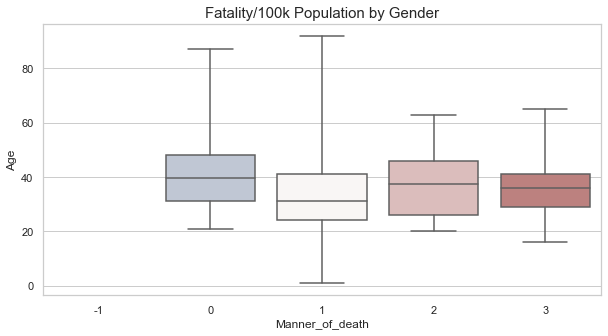

In [56]:
#Fatality/100k pop w.r.t gender
pl.figure(figsize =(10,5))
plt.xlabel('Fatality/100k pop', fontsize=12)
plt.ylabel('Gender', fontsize=12)
plt.title('Fatality/100k Population by Gender', fontsize=15)
sns.boxplot(x="Manner_of_death", y="Age", data=data, whis="range", palette="vlag")
plt.show()

In [57]:
data = data.drop("Date", axis=1)

In [58]:
data.columns

Index(['Population', 'Age', 'Gender', 'Race', 'Manner_of_death', 'Armed',
       'Mental_illness', 'Flee'],
      dtype='object')

In [59]:
data.isnull().sum()

Population           0
Age                274
Gender               0
Race                 0
Manner_of_death      0
Armed                0
Mental_illness       0
Flee                 0
dtype: int64

In [60]:
data = data.dropna()

In [61]:
data.isnull().sum()

Population         0
Age                0
Gender             0
Race               0
Manner_of_death    0
Armed              0
Mental_illness     0
Flee               0
dtype: int64

In [100]:
data.dtypes

Population           int64
Age                float64
Gender               int64
Race                 int64
Manner_of_death      int64
Armed                int64
Mental_illness       int64
Flee                 int64
fatality_rate        int32
dtype: object

In [101]:
#Classifying the fatality rate for each entry
#If fatality/100k value for each entry is greater than its mean value then
#1: High else 0:low
#data['fatality_rate']=np.where(data['Flee']>data['Flee'].mean(), 1, 0)

In [145]:
data['Flee']=np.where(data['Flee']>data['Flee'].mean(), 1, 0)

In [146]:
#Separating Labels and featureSet columns
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Flee']]
target = 'Flee'

X = data[columns]
y = data[target]

In [147]:
#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (6079, 8)
Training Labels: (6079,)
Testing FeatureSet: (2027, 8)
Testing Labels: (2027,)


In [148]:
#Initializing the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
#Fitting the model to the data.
model.fit(X_train, y_train)
#Generating predictions for the test set.
predictions = model.predict(X_test)
#Computing the Model Accuracy
print("Random Forrest Accuracy:",round(metrics.accuracy_score(y_test, predictions), 2)*100)
#Computing the error.
print("Mean Absoulte Error:", round(mean_absolute_error(predictions, y_test), 2)*100)
#Computing classification Report
print("Classification Report:\n", classification_report(y_test, predictions))
#Plotting confusion matrix
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0','1']])
print(df)

Random Forrest Accuracy: 100.0
Mean Absoulte Error: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1937
           1       1.00      1.00      1.00        90

    accuracy                           1.00      2027
   macro avg       1.00      1.00      1.00      2027
weighted avg       1.00      1.00      1.00      2027

Confusion Matrix:
         predicted    
                 0   1
actual 0      1937   0
       1         0  90


# managing imbalanced data set

In [149]:
data.head()

,Population,Age,Gender,Race,Manner_of_death,Armed,Mental_illness,Flee,fatality_rate
2,101764,50.0,2,1,1,19,1,0,0
3,101764,23.0,2,1,1,19,1,0,0
4,101764,48.0,2,1,1,8,1,0,0
5,101764,50.0,2,6,1,19,1,0,0
6,101764,50.0,2,6,2,29,2,0,0


In [150]:
X1 = data.drop(['Flee'], axis=1)
y1 = data['Flee']

In [151]:
y1.value_counts()

0    7788
1     318
Name: Flee, dtype: int64

<AxesSubplot:ylabel='Flee'>

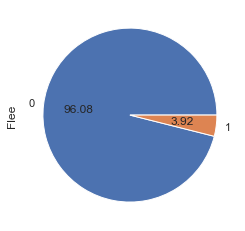

In [152]:
# Show pie plot (Approach 1)
y1.value_counts().plot.pie(autopct='%.2f')

# Random Undersampling

'not minority' = resample all classes but the minority class

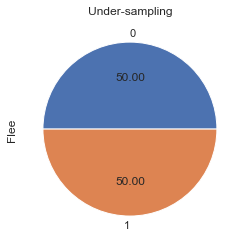

In [153]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X1_res, y1_res = rus.fit_resample(X1, y1)

ax = y1_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [154]:
# Class distribution
y1_res.value_counts()

0    318
1    318
Name: Flee, dtype: int64

# Random Oversampling

not majority" = resample all classes but the majority class

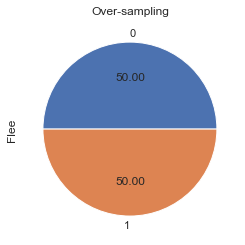

In [155]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X2_res, y2_res = ros.fit_resample(X1, y1)

ax = y2_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [156]:
y2_res.value_counts()

0    7788
1    7788
Name: Flee, dtype: int64

UNDERSAMPLING 

In [157]:
#Splitting data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_res, y1_res, test_size=0.25, random_state=1)

print("Training FeatureSet:", X1_train.shape)
print("Training Labels:", y1_train.shape)
print("Testing FeatureSet:", X1_test.shape)
print("Testing Labels:", y1_test.shape)

Training FeatureSet: (477, 8)
Training Labels: (477,)
Testing FeatureSet: (159, 8)
Testing Labels: (159,)


In [158]:
#Initializing the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
#Fitting the model to the data.
model.fit(X1_train, y1_train)
#Generating predictions for the test set.
predictions = model.predict(X1_test)
#Computing the Model Accuracy
print("Random Forrest Accuracy:",round(metrics.accuracy_score(y1_test, predictions), 2)*100)
#Computing the error.
print("Mean Absoulte Error:", round(mean_absolute_error(predictions, y1_test), 2)*100)
#Computing classification Report
print("Classification Report:\n", classification_report(y1_test, predictions))
#Plotting confusion matrix
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y1_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0','1']])
print(df)

Random Forrest Accuracy: 100.0
Mean Absoulte Error: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        84

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

Confusion Matrix:
         predicted    
                 0   1
actual 0        75   0
       1         0  84


OVERSAMPLING

In [159]:
#Splitting data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_res, y2_res, test_size=0.25, random_state=1)

print("Training FeatureSet:", X2_train.shape)
print("Training Labels:", y2_train.shape)
print("Testing FeatureSet:", X2_test.shape)
print("Testing Labels:", y2_test.shape)

Training FeatureSet: (11682, 8)
Training Labels: (11682,)
Testing FeatureSet: (3894, 8)
Testing Labels: (3894,)


In [160]:
#Initializing the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)
#Fitting the model to the data.
model.fit(X2_train, y2_train)
#Generating predictions for the test set.
predictions = model.predict(X2_test)
#Computing the Model Accuracy
print("Random Forrest Accuracy:",round(metrics.accuracy_score(y2_test, predictions), 2)*100)
#Computing the error.
print("Mean Absoulte Error:", round(mean_absolute_error(predictions, y2_test), 2)*100)
#Computing classification Report
print("Classification Report:\n", classification_report(y2_test, predictions))
#Plotting confusion matrix
print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y2_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0','1']])
print(df)

Random Forrest Accuracy: 100.0
Mean Absoulte Error: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1928
           1       1.00      1.00      1.00      1966

    accuracy                           1.00      3894
   macro avg       1.00      1.00      1.00      3894
weighted avg       1.00      1.00      1.00      3894

Confusion Matrix:
         predicted      
                 0     1
actual 0      1928     0
       1         0  1966


# Build classification model

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Random Forest

In [162]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X2_train, y2_train)

RandomForestClassifier(max_features=5, n_estimators=500)

Naive Bayes

In [163]:
nb = GaussianNB()
nb.fit(X2_train, y2_train)

GaussianNB()

Prediction probabilities 

In [164]:
r_probs = [0 for _ in range(len(y2_test))]
rf_probs = rf.predict_proba(X2_test)
nb_probs = nb.predict_proba(X2_test)

Probabilities for the positive outcome is kept.

In [165]:
rf_probs = rf_probs[:, 0]
nb_probs = nb_probs[:, 1]

Computing AUROC and ROC curve values

In [166]:
from sklearn.metrics import roc_curve, roc_auc_score

Calculate AUROC
###ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [167]:
r_auc = roc_auc_score(y2_test, r_probs)
rf_auc = roc_auc_score(y2_test, rf_probs)
nb_auc = roc_auc_score(y2_test, nb_probs)

Print AUROC scores

In [168]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.000
Naive Bayes: AUROC = 0.582


Calculate ROC curve

In [169]:
r_fpr, r_tpr, _ = roc_curve(y2_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y2_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y2_test, nb_probs)

Plot the ROC curve

In [170]:
import matplotlib.pyplot as plt

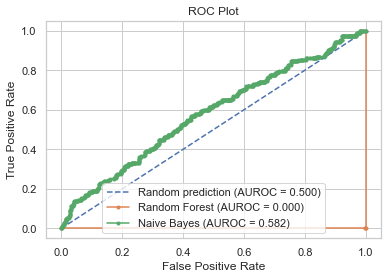

In [171]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

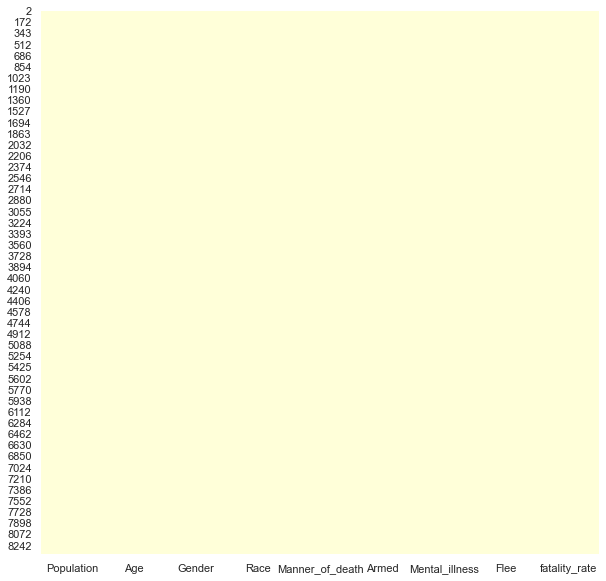

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

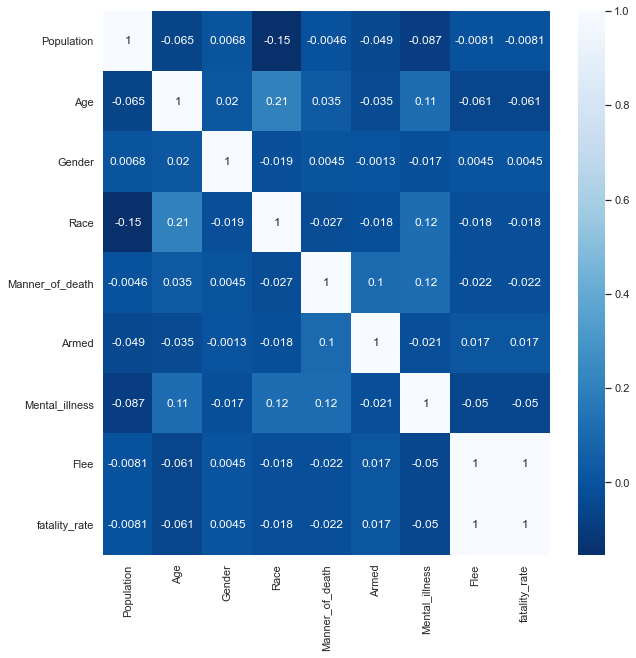

In [173]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues_r')
plt.ioff()

Text(0.5, 1.0, 'Correlations in fatality data')

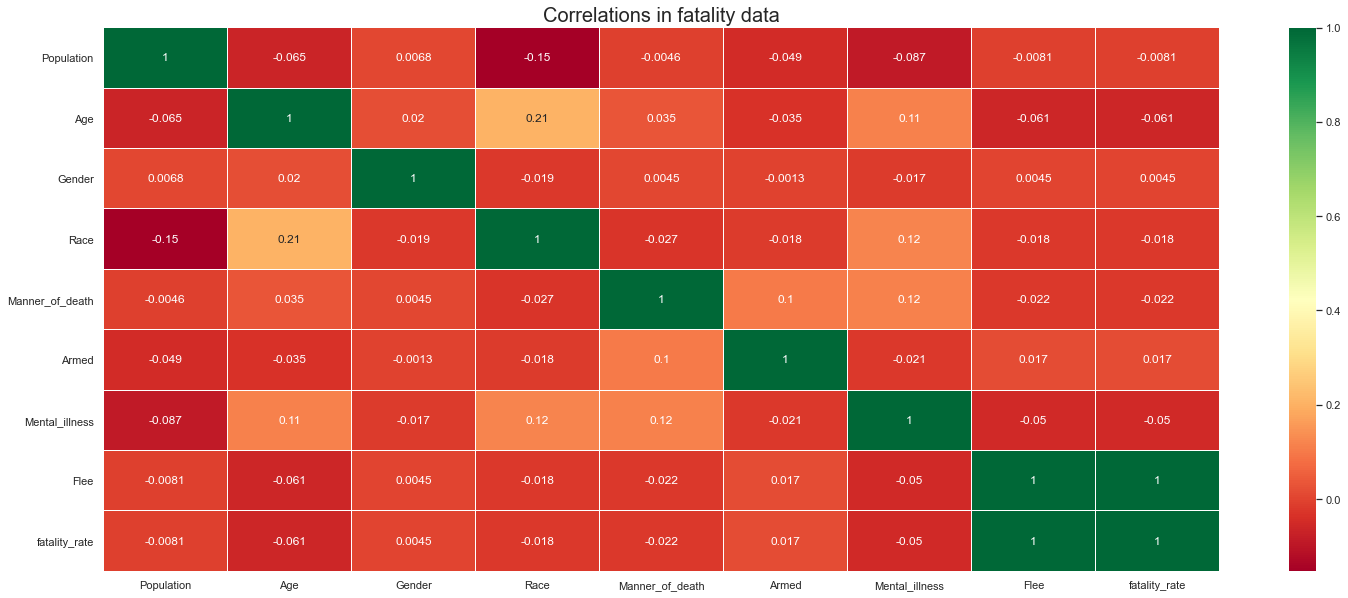

In [174]:
plt.subplots(figsize=(25,10))

sns.heatmap(data.corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Correlations in fatality data', fontsize=20)

In [175]:
data.columns

Index(['Population', 'Age', 'Gender', 'Race', 'Manner_of_death', 'Armed',
       'Mental_illness', 'Flee', 'fatality_rate'],
      dtype='object')

Text(0.5, 1.0, 'Correlations between fatality vs. Main ')

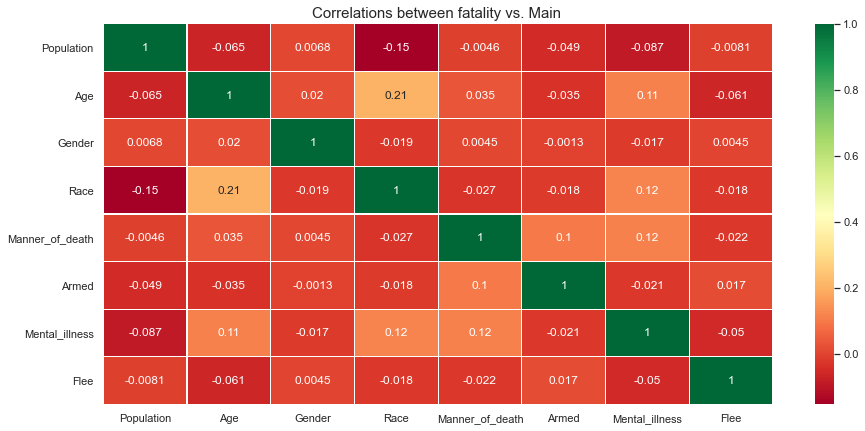

In [176]:
plt.subplots(figsize=(15,7))
sns.heatmap(data[['Population', 'Age', 'Gender', 'Race', 'Manner_of_death', 'Armed',
       'Mental_illness', 'Flee']].corr(), linewidths=.1, annot=True, cmap='RdYlGn');
plt.title('Correlations between fatality vs. Main ', fontsize=15)